In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
#fetching data
import pandas as pd
data=pd.read_csv(r"C:\Users\malik\Downloads\dataset1-master (1)\dataset1-master\abalone.csv")
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
#no of rows and columns
data.shape

(4177, 9)

In [7]:
#columns
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
#data type
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [9]:
#checking null and mean std
data.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [10]:
#null values identification
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
#correlation matrix
corr_mat=data.corr()

In [12]:
corr_mat

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
Rings                 0.503819      0.627574  1.000000

In [13]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['M','F','I']])
df1 = ord_encoder.fit_transform(data[['Sex']])
df1

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [14]:
data['Sex']=df1

In [15]:
data

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     0.0   0.455     0.365   0.095        0.5140          0.2245   
1     0.0   0.350     0.265   0.090        0.2255          0.0995   
2     1.0   0.530     0.420   0.135        0.6770          0.2565   
3     0.0   0.440     0.365   0.125        0.5160          0.2155   
4     2.0   0.330     0.255   0.080        0.2050          0.0895   
5     2.0   0.425     0.300   0.095        0.3515          0.1410   
6     1.0   0.530     0.415   0.150        0.7775          0.2370   
7     1.0   0.545     0.425   0.125        0.7680          0.2940   
8     0.0   0.475     0.370   0.125        0.5095          0.2165   
9     1.0   0.550     0.440   0.150        0.8945          0.3145   
10    1.0   0.525     0.380   0.140        0.6065          0.1940   
11    0.0   0.430     0.350   0.110        0.4060          0.1675   
12    0.0   0.490     0.380   0.135        0.5415          0.2175   
13    1.0   0.535     0.405   0.145        0.6845          0.2725   
14    1.0   0.470     0.355   0.100        0.4755          0.1675   
15    0.0   0.500     0.400   0.130        0.6645          0.2580   
16    2.0   0.355     0.280   0.085        0.2905          0.0950   
17    1.0   0.440     0.340   0.100        0.4510          0.1880   
18    0.0   0.365     0.295   0.080        0.2555          0.0970   
19    0.0   0.450     0.320   0.100        0.3810          0.1705   
20    0.0   0.355     0.280   0.095        0.2455          0.0955   
21    2.0   0.380     0.275   0.100        0.2255          0.0800   
22    1.0   0.565     0.440   0.155        0.9395          0.4275   
23    1.0   0.550     0.415   0.135        0.7635          0.3180   
24    1.0   0.615     0.480   0.165        1.1615          0.5130   
25    1.0   0.560     0.440   0.140        0.9285          0.3825   
26    1.0   0.580     0.450   0.185        0.9955          0.3945   
27    0.0   0.590     0.445   0.140        0.9310          0.3560   
28    0.0   0.605     0.475   0.180        0.9365          0.3940   
29    0.0   0.575     0.425   0.140        0.8635          0.3930   
30    0.0   0.580     0.470   0.165        0.9975          0.3935   
31    1.0   0.680     0.560   0.165        1.6390          0.6055   
32    0.0   0.665     0.525   0.165        1.3380          0.5515   
33    1.0   0.680     0.550   0.175        1.7980          0.8150   
34    1.0   0.705     0.550   0.200        1.7095          0.6330   
35    0.0   0.465     0.355   0.105        0.4795          0.2270   
36    1.0   0.540     0.475   0.155        1.2170          0.5305   
37    1.0   0.450     0.355   0.105        0.5225          0.2370   
38    1.0   0.575     0.445   0.135        0.8830          0.3810   
39    0.0   0.355     0.290   0.090        0.3275          0.1340   
40    1.0   0.450     0.335   0.105        0.4250          0.1865   
41    1.0   0.550     0.425   0.135        0.8515          0.3620   
42    2.0   0.240     0.175   0.045        0.0700          0.0315   
43    2.0   0.205     0.150   0.055        0.0420          0.0255   
44    2.0   0.210     0.150   0.050        0.0420          0.0175   
45    2.0   0.390     0.295   0.095        0.2030          0.0875   
46    0.0   0.470     0.370   0.120        0.5795          0.2930   
47    1.0   0.460     0.375   0.120        0.4605          0.1775   
48    2.0   0.325     0.245   0.070        0.1610          0.0755   
49    1.0   0.525     0.425   0.160        0.8355          0.3545   
50    2.0   0.520     0.410   0.120        0.5950          0.2385   
51    0.0   0.400     0.320   0.095        0.3030          0.1335   
52    0.0   0.485     0.360   0.130        0.5415          0.2595   
53    1.0   0.470     0.360   0.120        0.4775          0.2105   
54    0.0   0.405     0.310   0.100        0.3850          0.1730   
55    1.0   0.500     0.400   0.140        0.6615          0.2565   
56    0.0   0.445     0.350   0.120        0.4425          0.1920   
57  

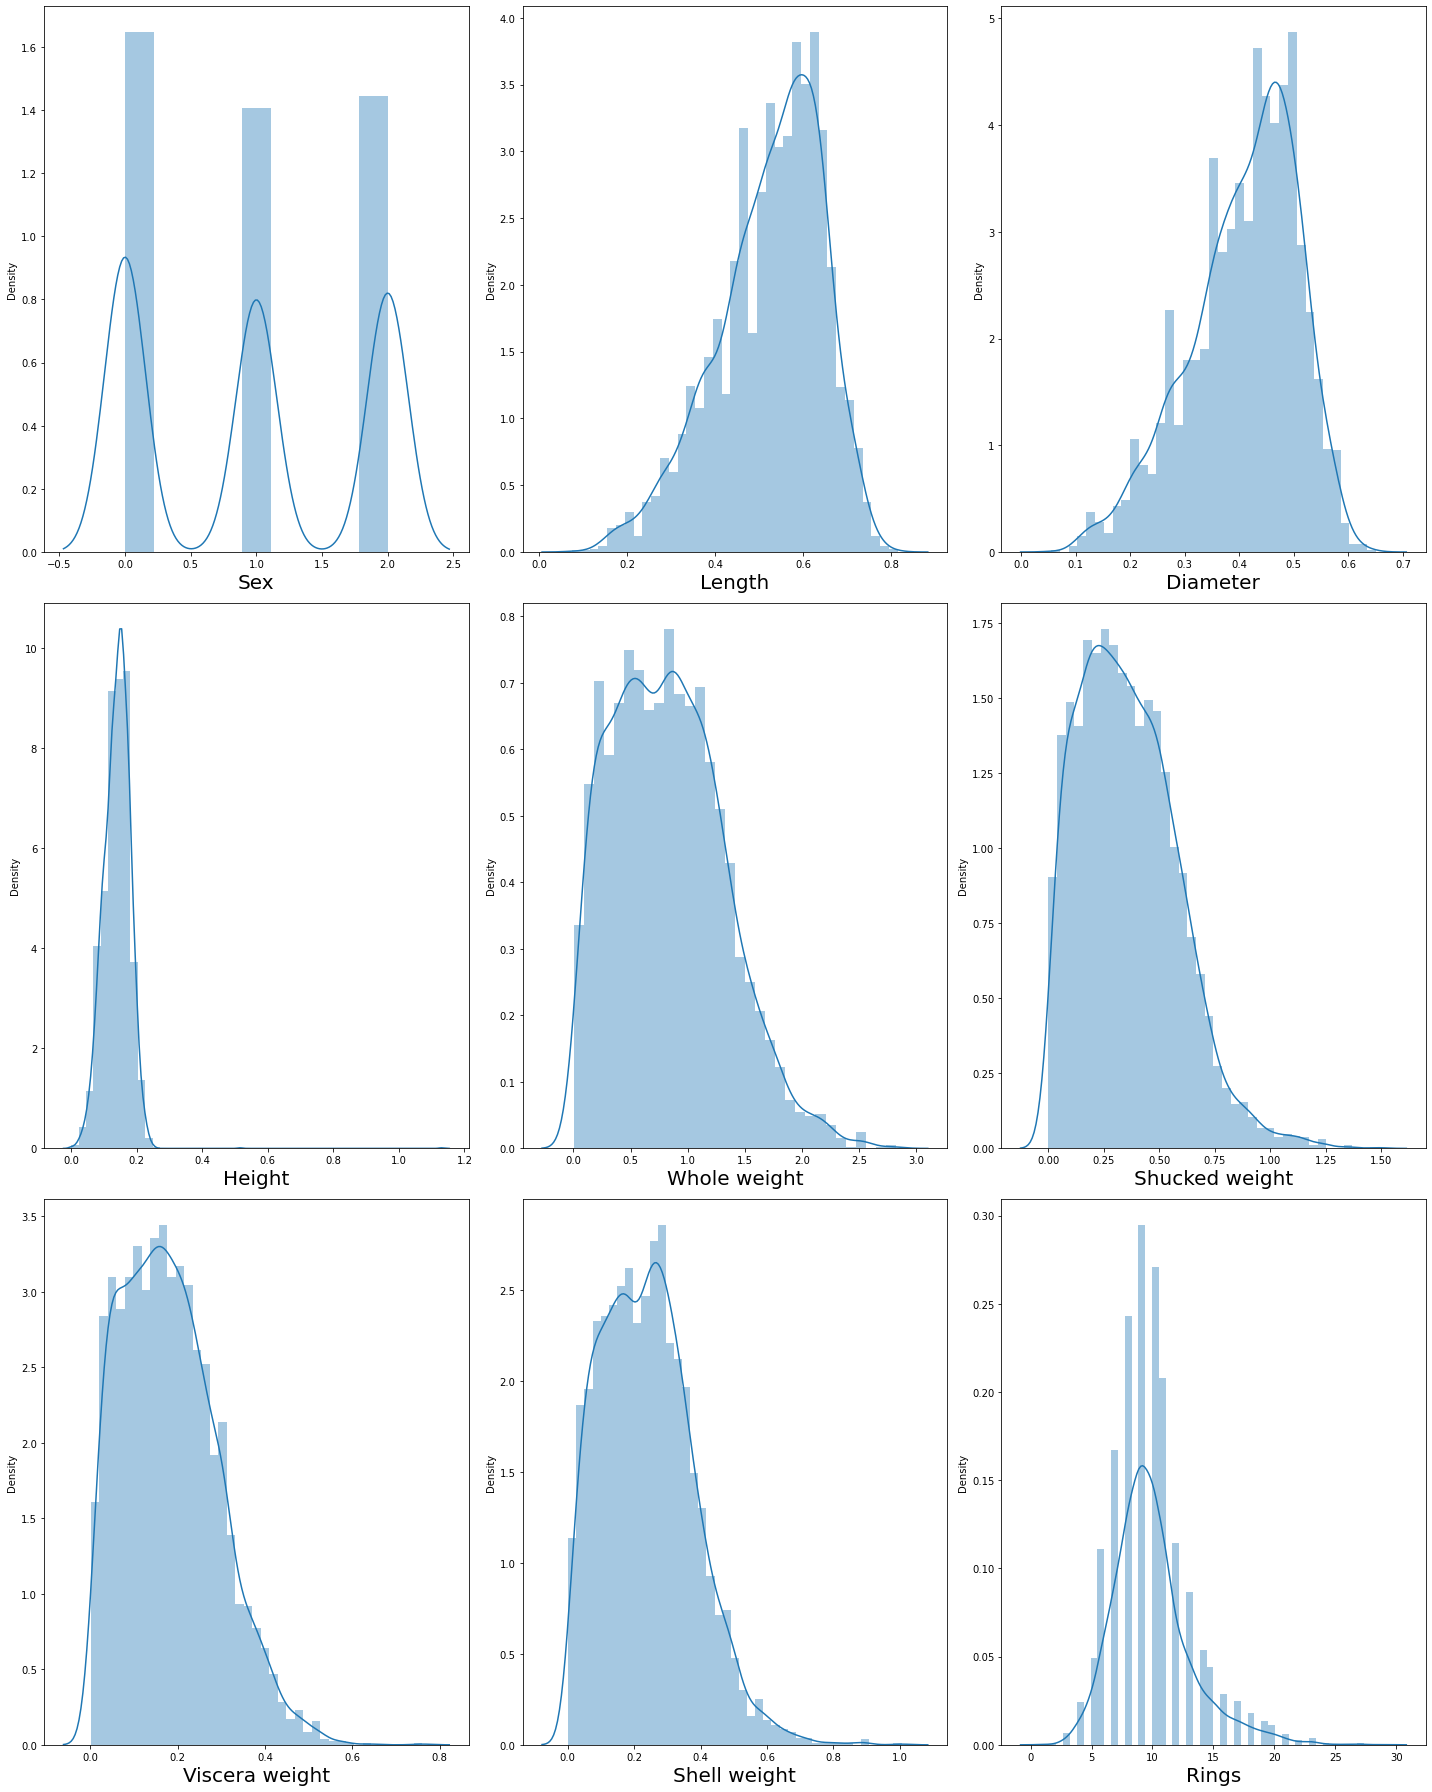

In [16]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax =plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
data

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     0.0   0.455     0.365   0.095        0.5140          0.2245   
1     0.0   0.350     0.265   0.090        0.2255          0.0995   
2     1.0   0.530     0.420   0.135        0.6770          0.2565   
3     0.0   0.440     0.365   0.125        0.5160          0.2155   
4     2.0   0.330     0.255   0.080        0.2050          0.0895   
5     2.0   0.425     0.300   0.095        0.3515          0.1410   
6     1.0   0.530     0.415   0.150        0.7775          0.2370   
7     1.0   0.545     0.425   0.125        0.7680          0.2940   
8     0.0   0.475     0.370   0.125        0.5095          0.2165   
9     1.0   0.550     0.440   0.150        0.8945          0.3145   
10    1.0   0.525     0.380   0.140        0.6065          0.1940   
11    0.0   0.430     0.350   0.110        0.4060          0.1675   
12    0.0   0.490     0.380   0.135        0.5415          0.2175   
13    1.0   0.535     0.405   0.145        0.6845          0.2725   
14    1.0   0.470     0.355   0.100        0.4755          0.1675   
15    0.0   0.500     0.400   0.130        0.6645          0.2580   
16    2.0   0.355     0.280   0.085        0.2905          0.0950   
17    1.0   0.440     0.340   0.100        0.4510          0.1880   
18    0.0   0.365     0.295   0.080        0.2555          0.0970   
19    0.0   0.450     0.320   0.100        0.3810          0.1705   
20    0.0   0.355     0.280   0.095        0.2455          0.0955   
21    2.0   0.380     0.275   0.100        0.2255          0.0800   
22    1.0   0.565     0.440   0.155        0.9395          0.4275   
23    1.0   0.550     0.415   0.135        0.7635          0.3180   
24    1.0   0.615     0.480   0.165        1.1615          0.5130   
25    1.0   0.560     0.440   0.140        0.9285          0.3825   
26    1.0   0.580     0.450   0.185        0.9955          0.3945   
27    0.0   0.590     0.445   0.140        0.9310          0.3560   
28    0.0   0.605     0.475   0.180        0.9365          0.3940   
29    0.0   0.575     0.425   0.140        0.8635          0.3930   
30    0.0   0.580     0.470   0.165        0.9975          0.3935   
31    1.0   0.680     0.560   0.165        1.6390          0.6055   
32    0.0   0.665     0.525   0.165        1.3380          0.5515   
33    1.0   0.680     0.550   0.175        1.7980          0.8150   
34    1.0   0.705     0.550   0.200        1.7095          0.6330   
35    0.0   0.465     0.355   0.105        0.4795          0.2270   
36    1.0   0.540     0.475   0.155        1.2170          0.5305   
37    1.0   0.450     0.355   0.105        0.5225          0.2370   
38    1.0   0.575     0.445   0.135        0.8830          0.3810   
39    0.0   0.355     0.290   0.090        0.3275          0.1340   
40    1.0   0.450     0.335   0.105        0.4250          0.1865   
41    1.0   0.550     0.425   0.135        0.8515          0.3620   
42    2.0   0.240     0.175   0.045        0.0700          0.0315   
43    2.0   0.205     0.150   0.055        0.0420          0.0255   
44    2.0   0.210     0.150   0.050        0.0420          0.0175   
45    2.0   0.390     0.295   0.095        0.2030          0.0875   
46    0.0   0.470     0.370   0.120        0.5795          0.2930   
47    1.0   0.460     0.375   0.120        0.4605          0.1775   
48    2.0   0.325     0.245   0.070        0.1610          0.0755   
49    1.0   0.525     0.425   0.160        0.8355          0.3545   
50    2.0   0.520     0.410   0.120        0.5950          0.2385   
51    0.0   0.400     0.320   0.095        0.3030          0.1335   
52    0.0   0.485     0.360   0.130        0.5415          0.2595   
53    1.0   0.470     0.360   0.120        0.4775          0.2105   
54    0.0   0.405     0.310   0.100        0.3850          0.1730   
55    1.0   0.500     0.400   0.140        0.6615          0.2565   
56    0.0   0.445     0.350   0.120        0.4425          0.1920   
57  

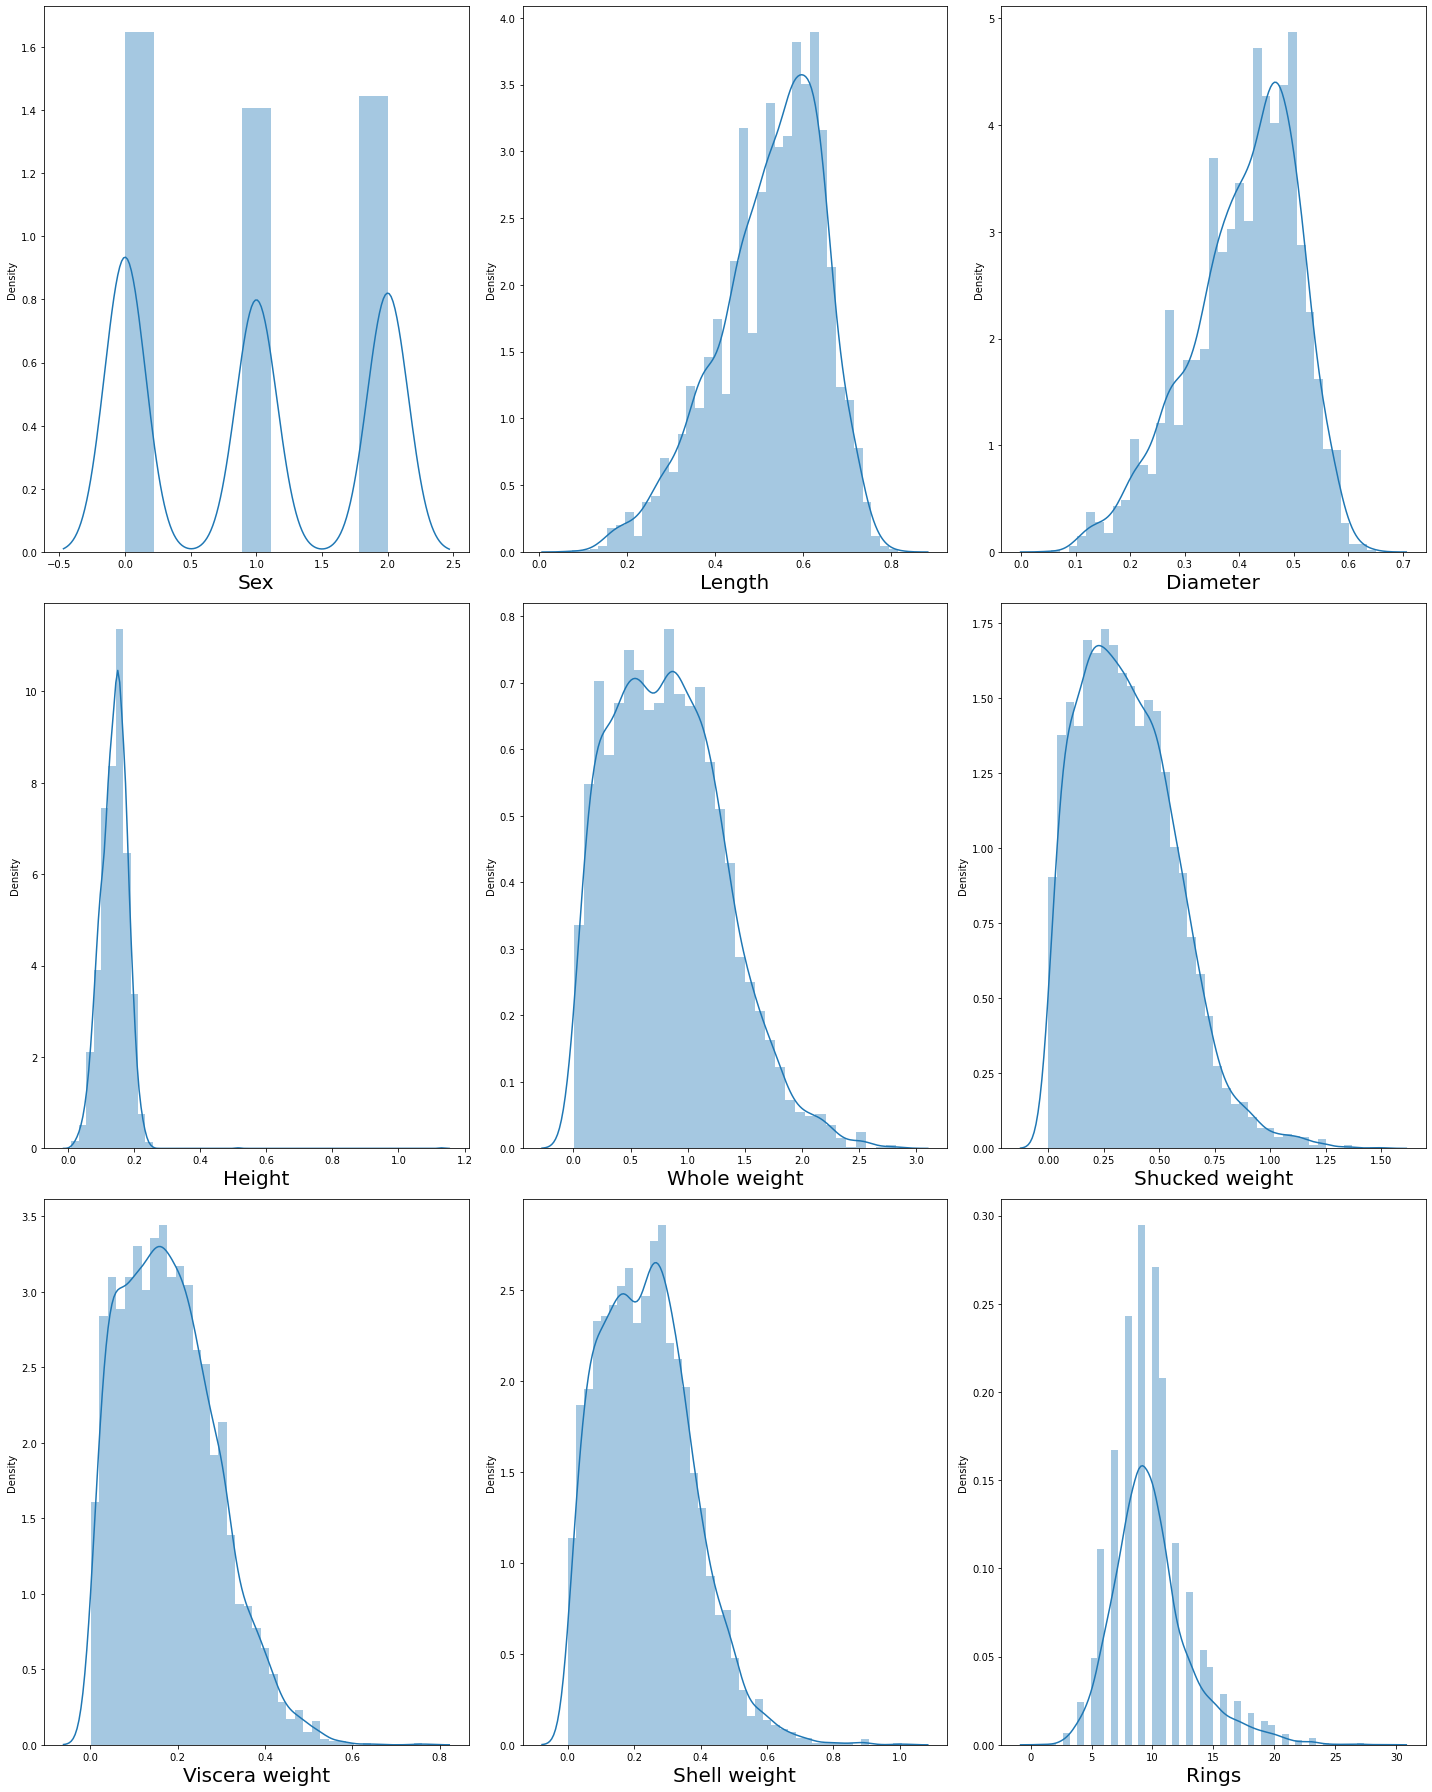

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax =plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
data.skew()

Sex               0.083056
Length           -0.639873
Diameter         -0.609198
Height            3.167107
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [21]:
from sklearn.preprocessing import power_transform
df_new=power_transform(data)

df_new=pd.DataFrame(df_new,columns=data.columns)

In [22]:
df_new.skew()

Sex              -0.095804
Length           -0.066669
Diameter         -0.065977
Height           -0.113754
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Rings             0.004429
dtype: float64

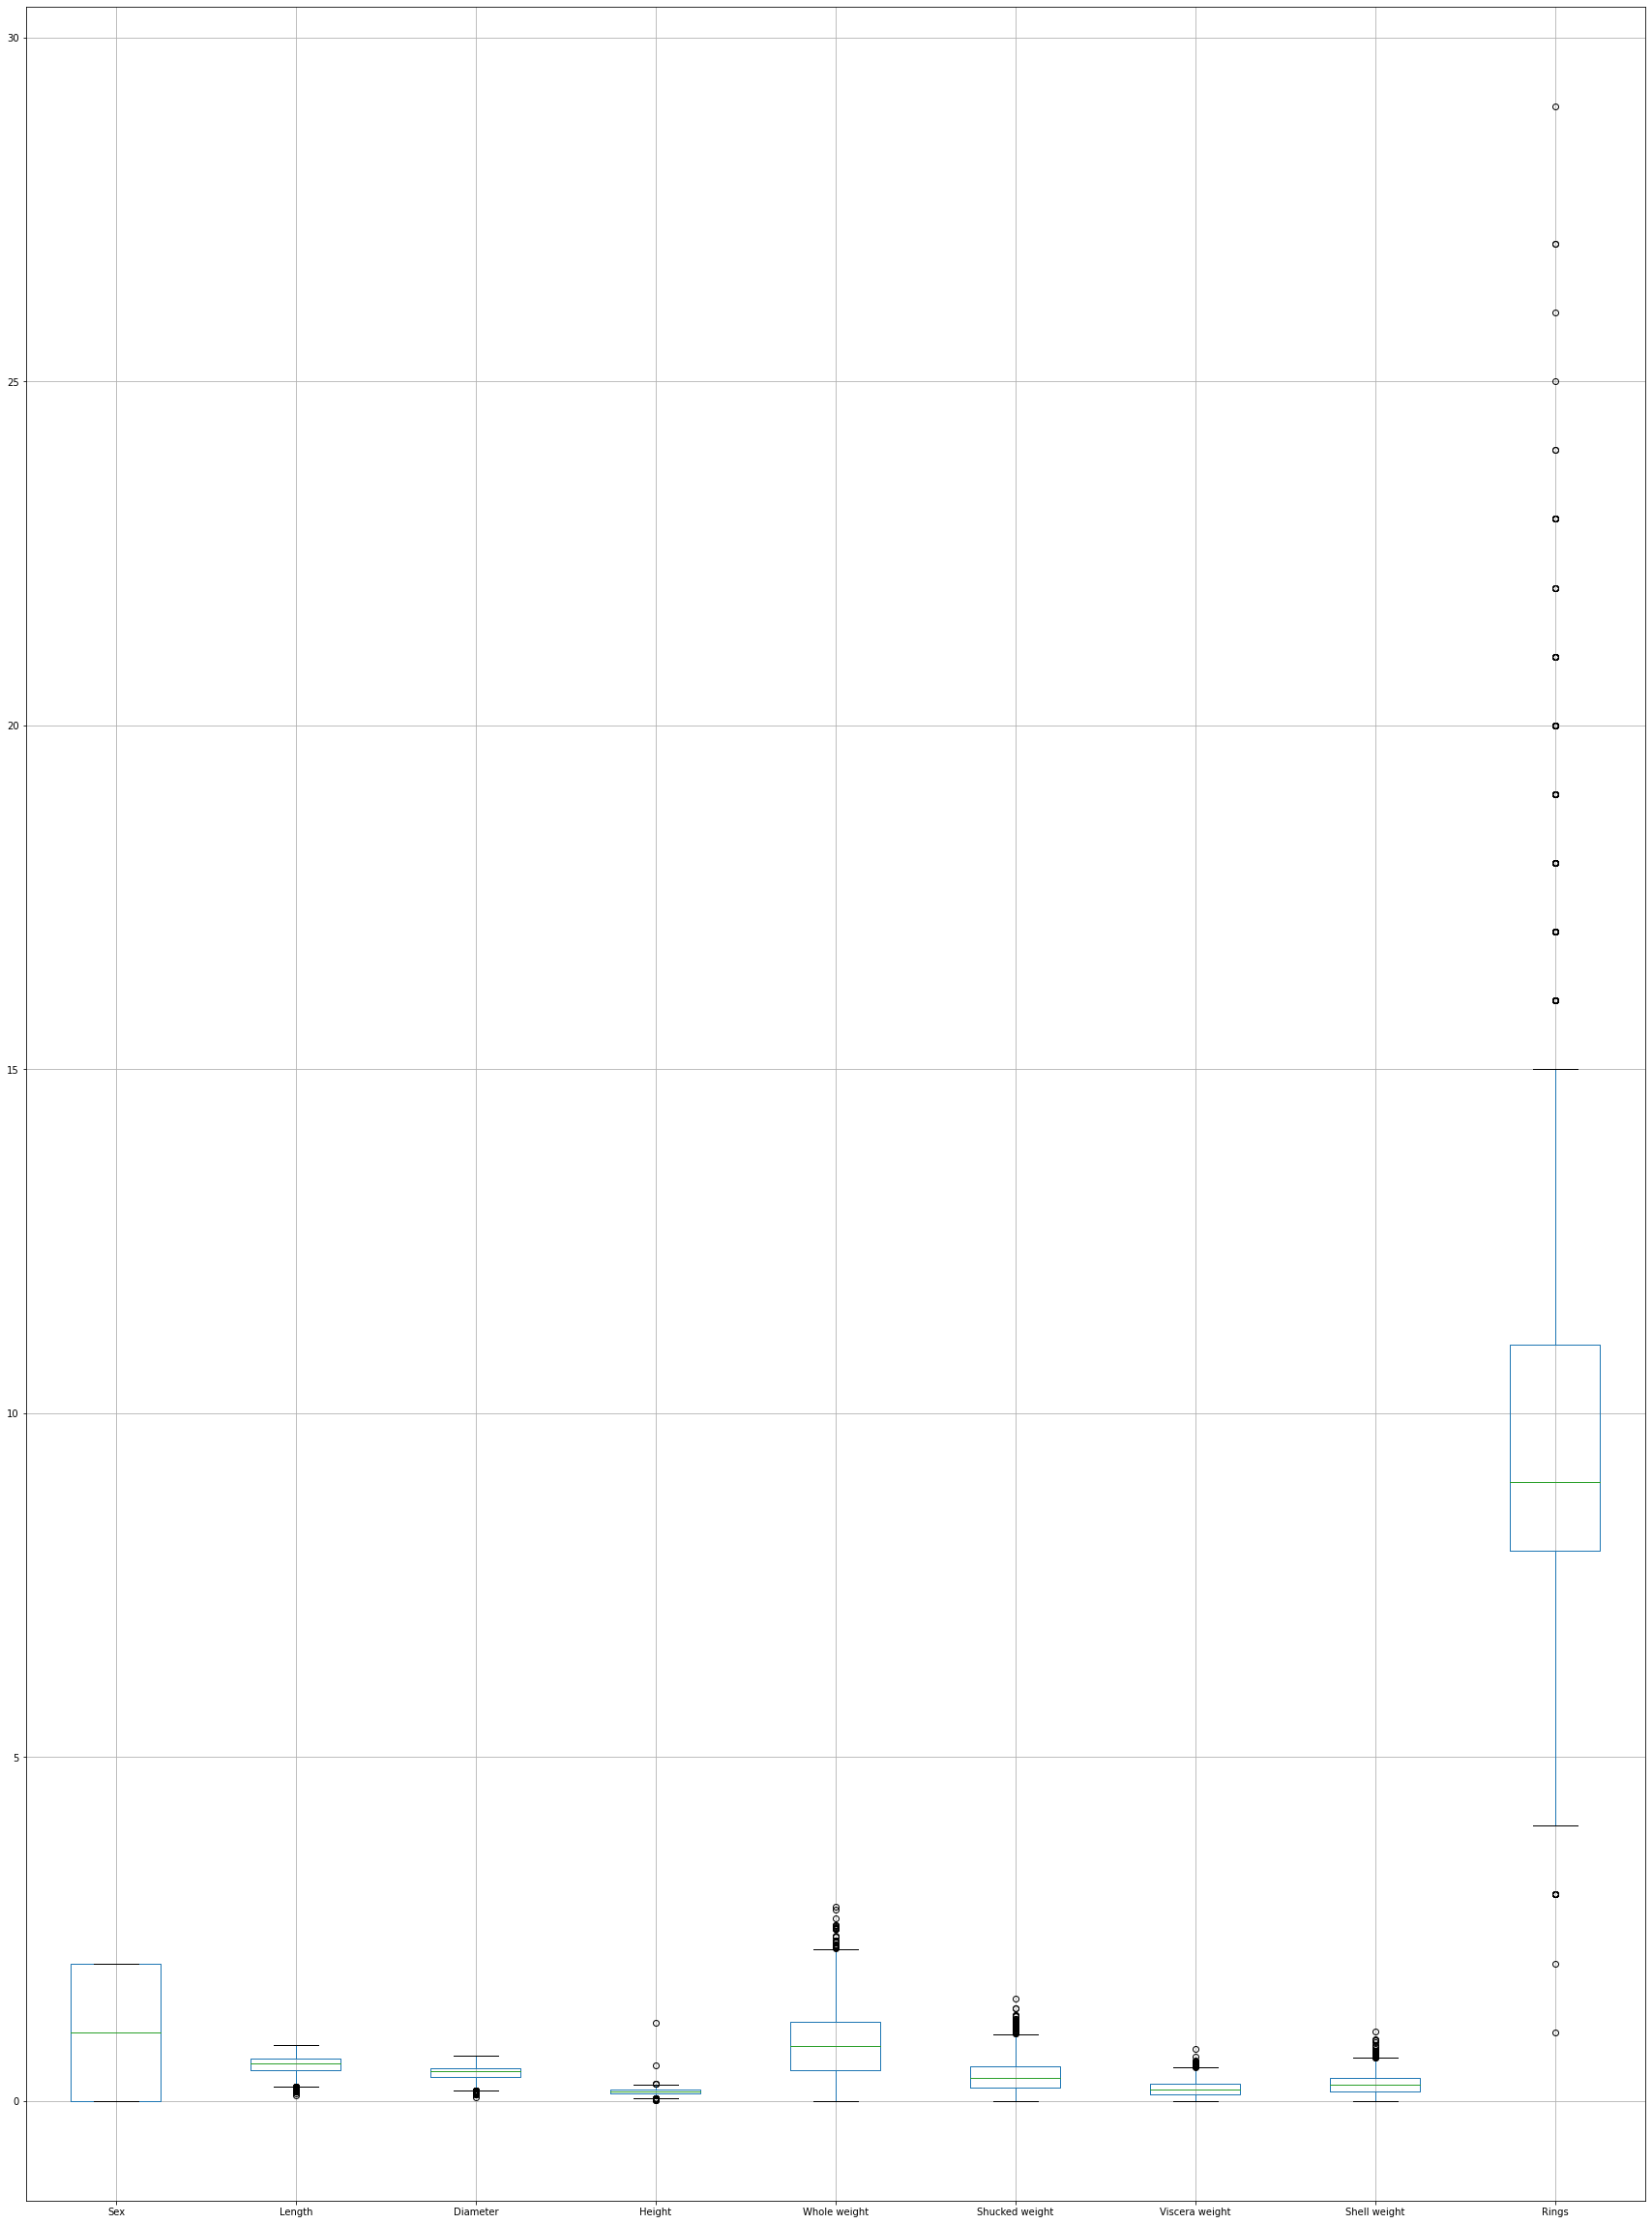

In [23]:
data.boxplot(figsize=[30,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [24]:
#cleaning data
q=data['Length'].quantile(0.70)
data_cleaned = data[data['Length']<q]
q=data_cleaned['Diameter'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['Diameter']<q]
q=data_cleaned['Height'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['Height']<q]
q=data_cleaned['Whole weight'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['Whole weight']<q]
q=data_cleaned['Shucked weight'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['Shucked weight']<q]
q=data_cleaned['Viscera weight'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['Viscera weight']<q]
q=data_cleaned['Shell weight'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['Shell weight']<q]

In [25]:
data_cleaned

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
42    2.0   0.240     0.175   0.045        0.0700          0.0315   
43    2.0   0.205     0.150   0.055        0.0420          0.0255   
44    2.0   0.210     0.150   0.050        0.0420          0.0175   
48    2.0   0.325     0.245   0.070        0.1610          0.0755   
58    2.0   0.245     0.190   0.060        0.0860          0.0420   
69    2.0   0.310     0.235   0.070        0.1510          0.0630   
125   2.0   0.270     0.195   0.060        0.0730          0.0285   
134   2.0   0.265     0.200   0.065        0.0975          0.0400   
136   1.0   0.305     0.230   0.080        0.1560          0.0675   
147   2.0   0.280     0.205   0.080        0.1270          0.0520   
148   2.0   0.175     0.130   0.055        0.0315          0.0105   
149   2.0   0.170     0.130   0.095        0.0300          0.0130   
174   2.0   0.235     0.160   0.040        0.0480          0.0185   
176   2.0   0.315     0.210   0.060        0.1250          0.0600   
178   2.0   0.225     0.160   0.045        0.0465          0.0250   
233   2.0   0.275     0.215   0.075        0.1155          0.0485   
235   2.0   0.295     0.225   0.080        0.1240          0.0485   
236   2.0   0.075     0.055   0.010        0.0020          0.0010   
237   2.0   0.130     0.100   0.030        0.0130          0.0045   
238   2.0   0.110     0.090   0.030        0.0080          0.0025   
239   2.0   0.160     0.120   0.035        0.0210          0.0075   
241   2.0   0.270     0.200   0.070        0.1000          0.0340   
242   2.0   0.230     0.175   0.065        0.0645          0.0260   
243   2.0   0.300     0.230   0.080        0.1275          0.0435   
246   2.0   0.320     0.245   0.080        0.1585          0.0635   
248   2.0   0.305     0.245   0.075        0.1560          0.0675   
263   2.0   0.245     0.195   0.060        0.0950          0.0445   
264   0.0   0.270     0.200   0.080        0.1205          0.0465   
295   2.0   0.295     0.215   0.085        0.1280          0.0490   
296   2.0   0.275     0.205   0.075        0.1105          0.0450   
297   2.0   0.280     0.210   0.085        0.1065          0.0390   
305   2.0   0.200     0.145   0.060        0.0370          0.0125   
306   2.0   0.165     0.120   0.030        0.0215          0.0070   
320   2.0   0.265     0.210   0.060        0.0965          0.0425   
321   2.0   0.190     0.145   0.040        0.0380          0.0165   
323   2.0   0.265     0.205   0.070        0.1055          0.0390   
332   2.0   0.300     0.220   0.080        0.1210          0.0475   
333   2.0   0.235     0.175   0.040        0.0705          0.0335   
423   2.0   0.290     0.225   0.070        0.1010          0.0360   
424   2.0   0.260     0.200   0.070        0.0920          0.0370   
462   2.0   0.240     0.185   0.070        0.0715          0.0260   
463   2.0   0.220     0.165   0.055        0.0545          0.0215   
464   2.0   0.255     0.195   0.070        0.0735          0.0255   
465   2.0   0.175     0.125   0.050        0.0235          0.0080   
513   0.0   0.310     0.220   0.085        0.1460          0.0610   
514   1.0   0.275     0.195   0.070        0.0800          0.0310   
515   0.0   0.270     0.195   0.080        0.1000          0.0385   
517   0.0   0.280     0.200   0.080        0.0915          0.0330   
518   0.0   0.325     0.230   0.090        0.1470          0.0600   
520   0.0   0.210     0.150   0.050        0.0385          0.0155   
523   0.0   0.200     0.140   0.055        0.0350          0.0145   
524   0.0   0.235     0.160   0.060        0.0545          0.0265   
525   0.0   0.175     0.125   0.040        0.0240          0.0095   
526   0.0   0.155     0.110   0.040        0.0155          0.0065   
537   0.0   0.290     0.230   0.075        0.1165          0.0430   
538   0.0   0.275     0.205   0.070        0.0940          0.0335   
545   0.0   0.320     0.245   0.075        0.1555          0.0585   
546 

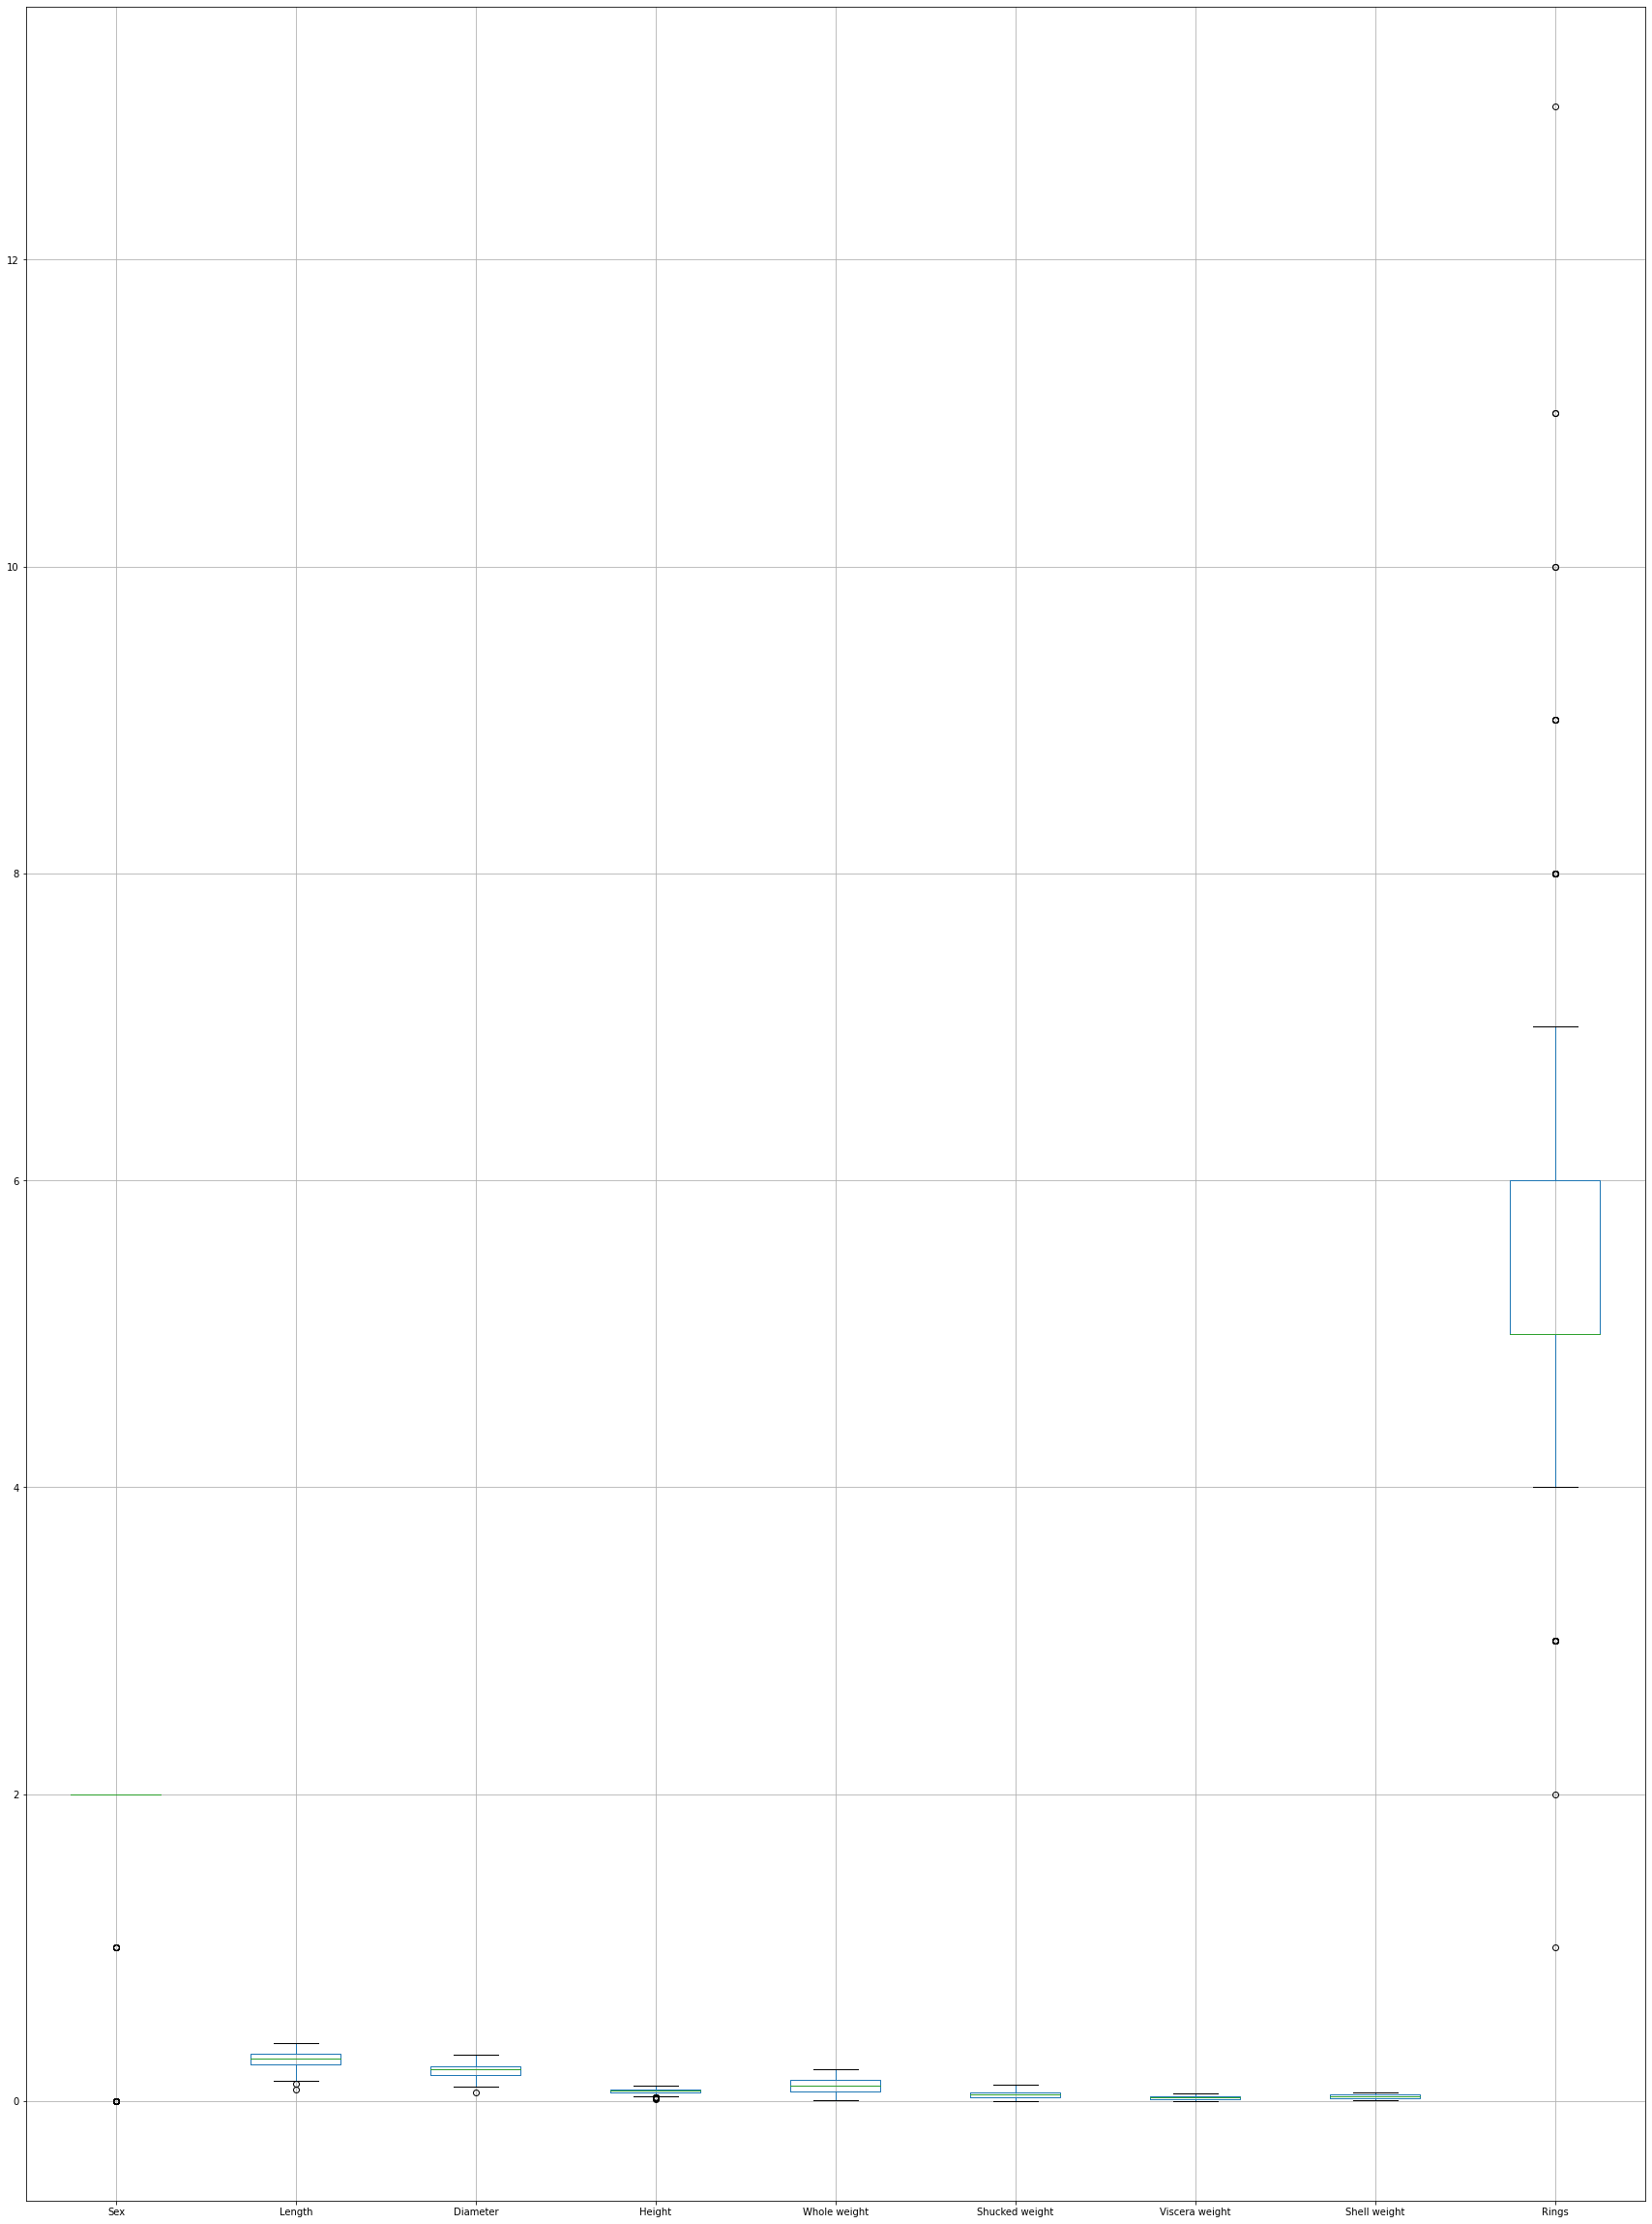

In [26]:
#for outliers
data_cleaned.boxplot(figsize=[30,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

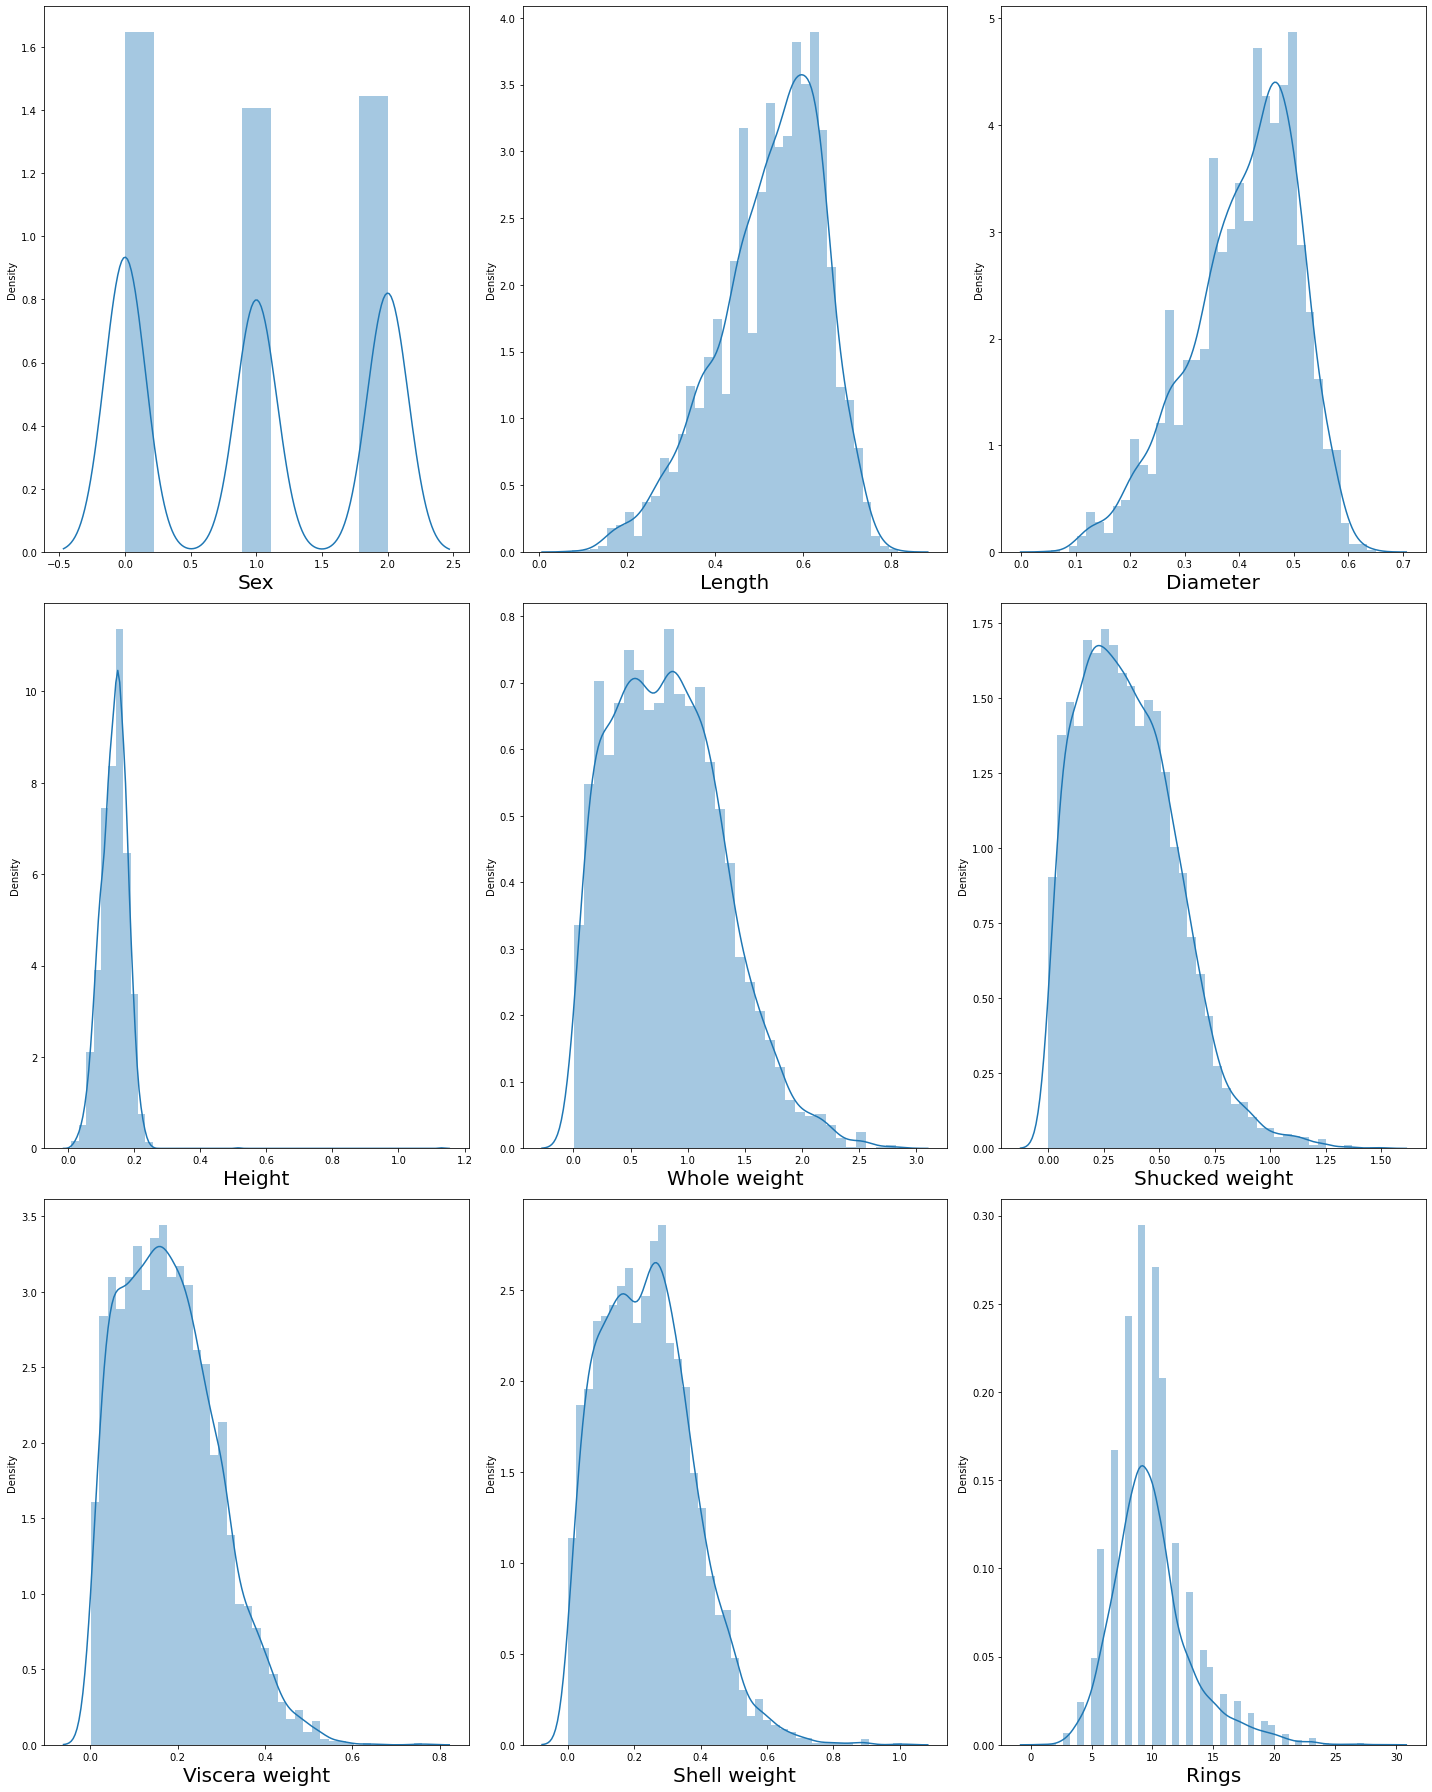

In [27]:
#plotting to check skewness
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9:
        ax =plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [28]:
data.head(5)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0  0.0   0.455     0.365   0.095        0.5140          0.2245   
1  0.0   0.350     0.265   0.090        0.2255          0.0995   
2  1.0   0.530     0.420   0.135        0.6770          0.2565   
3  0.0   0.440     0.365   0.125        0.5160          0.2155   
4  2.0   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

In [ ]:
#single feature data distribution checking

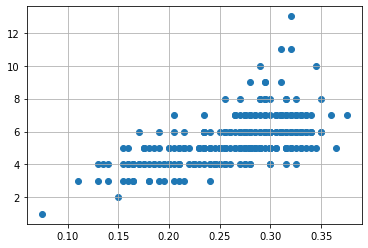

In [29]:
shu = 'Length'
plt.scatter(x = data_cleaned[shu], y = data_cleaned['Rings'],)
plt.grid(True)

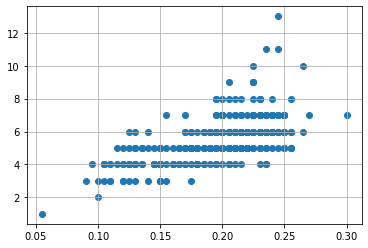

In [30]:
shu = 'Diameter'
plt.scatter(x = data_cleaned[shu], y = data_cleaned['Rings'],)
plt.grid(True)

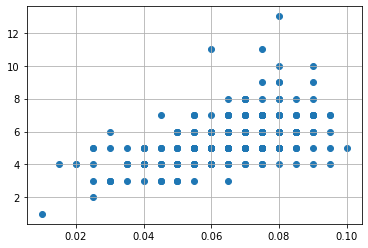

In [31]:
shu = 'Height'
plt.scatter(x = data_cleaned[shu], y = data_cleaned['Rings'],)
plt.grid(True)

In [32]:
data.drop(data[(data['Height']> 0.10) & (data['Rings'] < 12)].index, inplace=True)

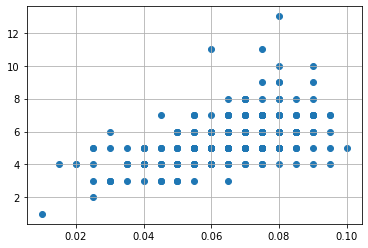

In [33]:
shu = 'Height'
plt.scatter(x = data_cleaned[shu], y = data_cleaned['Rings'],)
plt.grid(True)

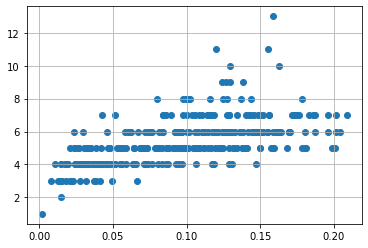

In [34]:
shu = 'Whole weight'
plt.scatter(x = data_cleaned[shu], y = data_cleaned['Rings'],)
plt.grid(True)

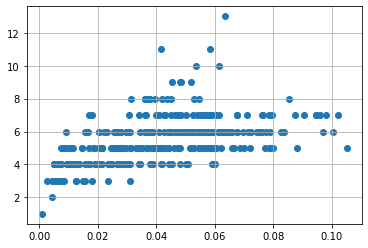

In [35]:
shu = 'Shucked weight'
plt.scatter(x = data_cleaned[shu], y = data_cleaned['Rings'],)
plt.grid(True)

In [36]:
data.drop(data[(data['Viscera weight']> 1.2) & (data['Rings'] < 28)].index, inplace=True)

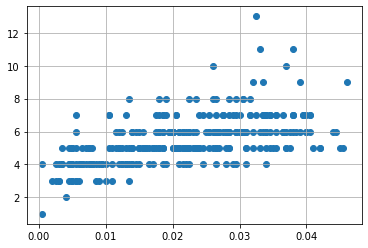

In [37]:
var = 'Viscera weight'
plt.scatter(x = data_cleaned[var], y = data_cleaned['Rings'],)
plt.grid(True)


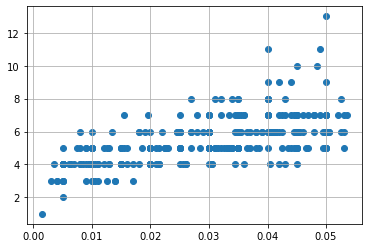

In [38]:
var = 'Shell weight'
plt.scatter(x = data_cleaned[var], y = data_cleaned['Rings'],)
plt.grid(True)

In [39]:
data.drop(data[(data['Viscera weight']> 0.6) & (data['Rings'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']> 0.8) & (data['Rings'] < 27)].index, inplace=True)

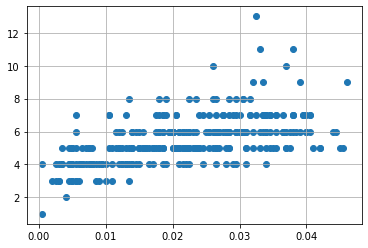

In [40]:
var = 'Viscera weight'
plt.scatter(x = data_cleaned[var], y = data_cleaned['Rings'],)
plt.grid(True)


In [41]:
sc=StandardScaler()
x=sc.fit_transform(data_cleaned)
x

array([[ 0.44483002, -0.46361836, -0.49036829, ...,  0.15957446,
        -0.69731663, -0.34118051],
       [ 0.44483002, -1.1080509 , -1.09202304, ..., -0.6169516 ,
        -1.27091579, -0.34118051],
       [ 0.44483002, -1.01598911, -1.09202304, ..., -0.84534161,
        -1.05581611, -1.01473688],
       ...,
       [ 0.44483002,  0.27287596,  0.47227932, ..., -0.02313755,
         0.01968232,  0.33237585],
       [ 0.44483002,  1.19349386,  0.83327217, ...,  1.34720255,
         1.16688065,  1.00593222],
       [ 0.44483002,  1.56174103,  1.31459598, ...,  1.25584655,
         0.80838117,  0.33237585]])

In [42]:
#removing skew ness
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

In [43]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(x)

In [44]:
x_new 

array([[ 1.45088755, -0.47647492,  0.22935594, ..., -0.27803331,
         0.01623297, -0.11271664],
       [ 2.5239521 , -0.24718195,  0.37599073, ..., -0.36189651,
        -0.01656334, -0.21793063],
       [ 2.89181096, -0.4397072 , -0.11576483, ...,  0.01215353,
         0.05626383, -0.07931995],
       ...,
       [-0.9790714 , -0.47931422,  0.16066097, ..., -0.38847799,
        -0.1425772 , -0.04939126],
       [-2.77473017, -0.32864663,  0.49517612, ...,  0.15337449,
         0.25390636, -0.08063457],
       [-3.30984171, -0.81758052, -0.3518356 , ..., -0.58991187,
         0.16351137, -0.06941563]])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

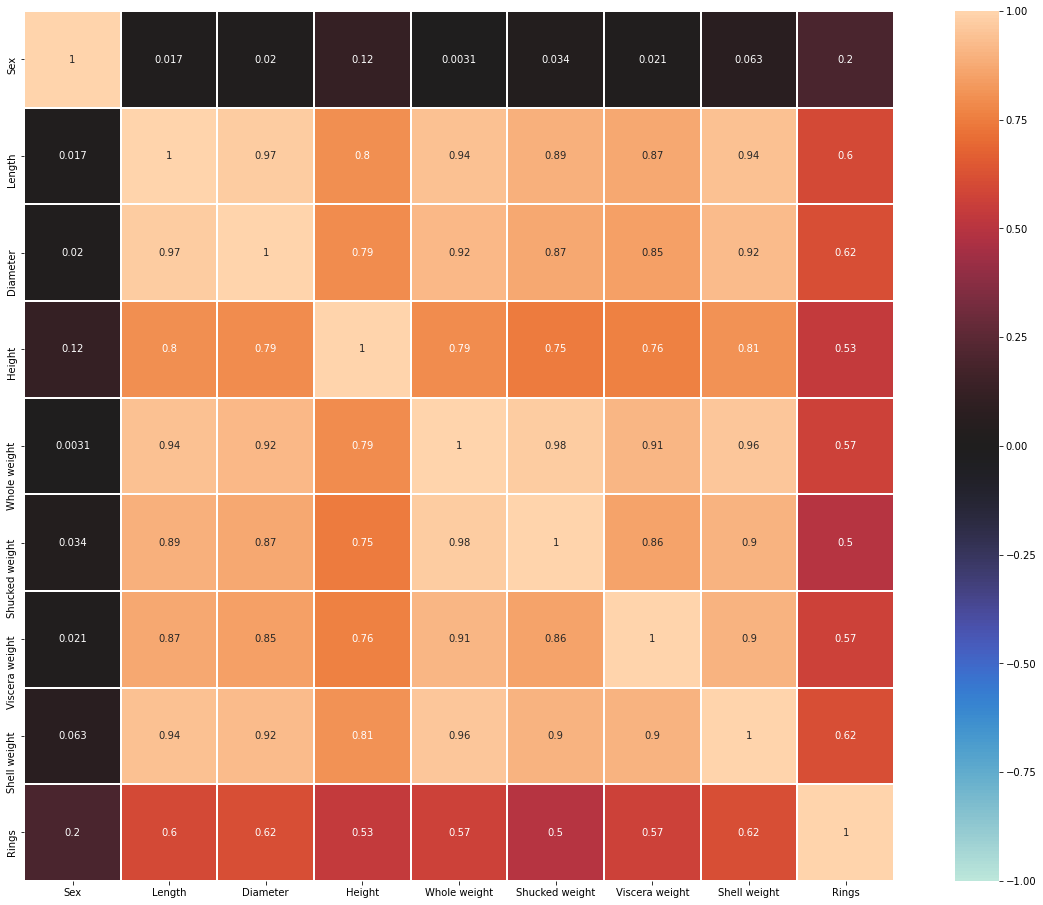

In [45]:
#heat map for corelation checking
df_corr =data_cleaned.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,  vmin=-1,annot=True,
           square=True,center=0,fmt='.2g',linewidths=1,)
plt.tight_layout

In [46]:
#splitting data
y=data_cleaned['Rings']

x=data_cleaned.drop(columns=['Rings'])

In [47]:
y

42       5
43       5
44       4
48       6
58       4
69       6
125      5
134      7
136      7
147      9
148      5
149      4
174      5
176      5
178      4
233      7
235      9
236      1
237      3
238      3
239      5
241      5
242      5
243      8
246     13
248      7
263      4
264      6
295      6
296      6
297      4
305      4
306      3
320      5
321      4
323      5
332      5
333      5
423      8
424      6
462      6
463      5
464      6
465      5
513      6
514      5
515      6
517      5
518      4
520      3
523      5
524      4
525      4
526      3
537      7
538      5
545     11
546      8
547      7
568      7
611      4
618      9
619      7
640      7
646      6
650      5
653      7
655      7
691      5
694      4
695      7
696      4
697      5
709      7
712      7
715      7
716      8
717      6
718      4
719      2
720      3
784      5
806      6
812      6
813      5
814      7
815      7
892      6
893      5
894      3
895      6

In [48]:
x

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
42    2.0   0.240     0.175   0.045        0.0700          0.0315   
43    2.0   0.205     0.150   0.055        0.0420          0.0255   
44    2.0   0.210     0.150   0.050        0.0420          0.0175   
48    2.0   0.325     0.245   0.070        0.1610          0.0755   
58    2.0   0.245     0.190   0.060        0.0860          0.0420   
69    2.0   0.310     0.235   0.070        0.1510          0.0630   
125   2.0   0.270     0.195   0.060        0.0730          0.0285   
134   2.0   0.265     0.200   0.065        0.0975          0.0400   
136   1.0   0.305     0.230   0.080        0.1560          0.0675   
147   2.0   0.280     0.205   0.080        0.1270          0.0520   
148   2.0   0.175     0.130   0.055        0.0315          0.0105   
149   2.0   0.170     0.130   0.095        0.0300          0.0130   
174   2.0   0.235     0.160   0.040        0.0480          0.0185   
176   2.0   0.315     0.210   0.060        0.1250          0.0600   
178   2.0   0.225     0.160   0.045        0.0465          0.0250   
233   2.0   0.275     0.215   0.075        0.1155          0.0485   
235   2.0   0.295     0.225   0.080        0.1240          0.0485   
236   2.0   0.075     0.055   0.010        0.0020          0.0010   
237   2.0   0.130     0.100   0.030        0.0130          0.0045   
238   2.0   0.110     0.090   0.030        0.0080          0.0025   
239   2.0   0.160     0.120   0.035        0.0210          0.0075   
241   2.0   0.270     0.200   0.070        0.1000          0.0340   
242   2.0   0.230     0.175   0.065        0.0645          0.0260   
243   2.0   0.300     0.230   0.080        0.1275          0.0435   
246   2.0   0.320     0.245   0.080        0.1585          0.0635   
248   2.0   0.305     0.245   0.075        0.1560          0.0675   
263   2.0   0.245     0.195   0.060        0.0950          0.0445   
264   0.0   0.270     0.200   0.080        0.1205          0.0465   
295   2.0   0.295     0.215   0.085        0.1280          0.0490   
296   2.0   0.275     0.205   0.075        0.1105          0.0450   
297   2.0   0.280     0.210   0.085        0.1065          0.0390   
305   2.0   0.200     0.145   0.060        0.0370          0.0125   
306   2.0   0.165     0.120   0.030        0.0215          0.0070   
320   2.0   0.265     0.210   0.060        0.0965          0.0425   
321   2.0   0.190     0.145   0.040        0.0380          0.0165   
323   2.0   0.265     0.205   0.070        0.1055          0.0390   
332   2.0   0.300     0.220   0.080        0.1210          0.0475   
333   2.0   0.235     0.175   0.040        0.0705          0.0335   
423   2.0   0.290     0.225   0.070        0.1010          0.0360   
424   2.0   0.260     0.200   0.070        0.0920          0.0370   
462   2.0   0.240     0.185   0.070        0.0715          0.0260   
463   2.0   0.220     0.165   0.055        0.0545          0.0215   
464   2.0   0.255     0.195   0.070        0.0735          0.0255   
465   2.0   0.175     0.125   0.050        0.0235          0.0080   
513   0.0   0.310     0.220   0.085        0.1460          0.0610   
514   1.0   0.275     0.195   0.070        0.0800          0.0310   
515   0.0   0.270     0.195   0.080        0.1000          0.0385   
517   0.0   0.280     0.200   0.080        0.0915          0.0330   
518   0.0   0.325     0.230   0.090        0.1470          0.0600   
520   0.0   0.210     0.150   0.050        0.0385          0.0155   
523   0.0   0.200     0.140   0.055        0.0350          0.0145   
524   0.0   0.235     0.160   0.060        0.0545          0.0265   
525   0.0   0.175     0.125   0.040        0.0240          0.0095   
526   0.0   0.155     0.110   0.040        0.0155          0.0065   
537   0.0   0.290     0.230   0.075        0.1165          0.0430   
538   0.0   0.275     0.205   0.070        0.0940          0.0335   
545   0.0   0.320     0.245   0.075        0.1555          0.0585   
546 

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [50]:
#dtc
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
feature_name = list(x.columns)
class_name = list(y_train.unique())
feature_name

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [52]:
clf.score(x_train,y_train)

1.0

In [53]:
y_pred=clf.predict(x_test)

In [54]:
clf.score(x_test,y_test)

0.23376623376623376

In [55]:
#lr
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred=log_reg.predict(x_test)

In [57]:

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.24675324675324675

In [58]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(log_reg,x,y,cv=5)
print("cvs of lr:",scr.mean())

cvs of lr: 0.32358540454785834


In [59]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(clf,x,y,cv=5)
print("cvs of lr:",scr.mean())

cvs of lr: 0.33003701745108405


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

In [61]:
print(accuracy_score(y_test,predrf))

0.23376623376623376


In [62]:
print(confusion_matrix(y_test,predrf))

[[ 0  4  2  0  0  0  0  0]
 [ 1  7  7  5  0  0  0  0]
 [ 0  4  4 15  0  0  0  0]
 [ 0  0  2  5  5  0  0  0]
 [ 0  0  3  5  2  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  1  1  0  0  0]
 [ 0  0  0  0  1  0  0  0]]


In [63]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.47      0.35      0.40        20
           5       0.22      0.17      0.20        23
           6       0.15      0.42      0.22        12
           7       0.22      0.20      0.21        10
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1

    accuracy                           0.23        77
   macro avg       0.13      0.14      0.13        77
weighted avg       0.24      0.23      0.22        77



In [64]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
ad_pred = svr.predict(x_test)

In [65]:
print(accuracy_score(y_test,predrf))

0.23376623376623376


In [66]:
print(confusion_matrix(y_test,predrf))

[[ 0  4  2  0  0  0  0  0]
 [ 1  7  7  5  0  0  0  0]
 [ 0  4  4 15  0  0  0  0]
 [ 0  0  2  5  5  0  0  0]
 [ 0  0  3  5  2  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  1  1  0  0  0]
 [ 0  0  0  0  1  0  0  0]]


In [67]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.47      0.35      0.40        20
           5       0.22      0.17      0.20        23
           6       0.15      0.42      0.22        12
           7       0.22      0.20      0.21        10
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1

    accuracy                           0.23        77
   macro avg       0.13      0.14      0.13        77
weighted avg       0.24      0.23      0.22        77



In [68]:
#dtr
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()  
reg.fit(x_train, y_train) 
y_predicted1 = reg.predict(x_test)

In [69]:
reg.score(x_train,y_train)

1.0

In [70]:
reg.score(x_test,y_test)

-0.4609253773451827

In [71]:
probes = rf.predict_proba(x_test)

ValueError: Found input variables with inconsistent numbers of samples: [616, 924]

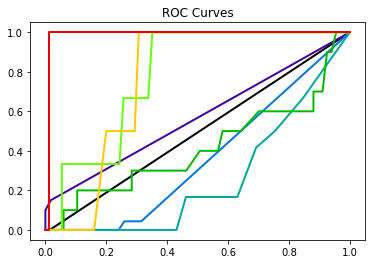

In [72]:
#roc curve
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,probes)
plt.show()

In [73]:
#grid search cv
from sklearn.model_selection import GridSearchCV

In [74]:
#gridsearch cv
parameters={'n_estimators':[100,200],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9],
           'criterion':['gini','entropy']}

In [75]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [77]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

In [78]:
mod = RandomForestClassifier(criterion='entropy',max_depth=6,max_features='log2',n_estimators=100)

In [79]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred))

0.35064935064935066


In [80]:
#model saving
import pickle

from sklearn import model_selection
filename = 'ablone.sav'
pickle.dump(data, open(filename, 'wb'))